In [1]:
import warnings
warnings.filterwarnings("ignore")

import pickle, pandas as pd
from datetime import datetime
import os

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data_dir_base = "/Users/hn/Documents/01_research_data/Ehsan/wheat/"

wheat_reOrganized = data_dir_base + "wheat_reOrganized/"
wheat_plot_dir = data_dir_base + "plots/"

os.makedirs(wheat_reOrganized, exist_ok=True)
os.makedirs(wheat_plot_dir, exist_ok=True)

In [3]:
# !pip3 install openpyxl

In [4]:
merged_varieties = pd.read_excel(data_dir_base + "merged_varieties.xlsx")
merged_with_vars = pd.read_excel(data_dir_base + "merged_with_vars.xlsx")

In [5]:
merged_varieties.drop(["Location", "Year"], axis="columns", inplace=True)
merged_varieties.head(2)

,location,year,1_Tavg,2_Tavg,3_Tavg,4_Tavg,5_Tavg,6_Tavg,7_Tavg,8_Tavg,...,17_vs,18_vs,19_vs,20_vs,21_vs,22_vs,23_vs,24_vs,25_vs,Grain_yield
0,Almira,2005,7.725714,14.655000,11.125714,14.511429,14.647143,12.345000,18.738571,14.102143,...,2.528571,2.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.088889
1,Almira,2006,8.555714,12.201429,9.725000,12.675714,21.397857,12.253571,16.030714,16.796429,...,3.633333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.019048


In [6]:
list(merged_varieties.columns)[:5]

['location', 'year', '1_Tavg', '2_Tavg', '3_Tavg']

In [7]:
print ((merged_varieties["7_dtr"] == merged_varieties["7_dtr.1"]).sum())
print ((merged_varieties["8_dtr"] == merged_varieties["8_dtr.1"]).sum())

229
229


### Clean up

In [8]:
dtr_cols = [x for x in merged_varieties.columns if "dtr" in x]
dtr_cols_repetitions = [x for x in dtr_cols if "." in x]
print (merged_varieties.shape)
merged_varieties.drop(dtr_cols_repetitions, axis="columns", inplace=True)
print (merged_varieties.shape)

(229, 328)
(229, 303)


In [9]:
merged_varieties.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)
merged_with_vars.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)

In [10]:
list(merged_with_vars.columns)[:5]

['location', 'year', '1_tavg', '2_tavg', '3_tavg']

#### Rename columns so I can remember?

In [11]:
merged_with_vars.rename(columns={"grain_yield": "yield"}, inplace=True)
merged_varieties.rename(columns={"grain_yield": "yield"}, inplace=True)

#### reorder columns

In [12]:
merged_varieties.columns

Index(['location', 'year', '1_tavg', '2_tavg', '3_tavg', '4_tavg', '5_tavg',
       '6_tavg', '7_tavg', '8_tavg',
       ...
       '17_vs', '18_vs', '19_vs', '20_vs', '21_vs', '22_vs', '23_vs', '24_vs',
       '25_vs', 'yield'],
      dtype='object', length=303)

In [13]:
lyy = ["location", "year", "yield"]
others_ = [x for x in merged_varieties.columns if not(x in lyy)]
len(others_) + len(lyy) == len(merged_varieties.columns)

True

In [14]:
merged_varieties = merged_varieties[lyy + others_]

In [15]:
lyy = ["location", "year", "variety", "yield"]
others_ = [x for x in merged_with_vars.columns if not(x in lyy)]
len(others_) + len(lyy) == len(merged_with_vars.columns)

True

In [16]:
merged_with_vars = merged_with_vars[lyy + others_]

In [17]:
wheat_date = pd.read_csv(data_dir_base + "spring_wheat_date.csv")
wheat_date.head(2)

,year,location,Latitude,Longitude,planting_date,heading_date,harvest_date,planting_doy,harvesting_doy
0,2005,Almira,47.51921,-118.53658,4/14/2005,6/25/2005,8/16/2005,104,228
1,2006,Almira,47.51921,-118.53658,4/18/2006,6/29/2006,8/10/2006,108,222


In [18]:
wheat_date.rename(columns={"planting_doy": "plant_doy",
                           "harvesting_doy": "harvest_doy"}, inplace=True)

wheat_date["season_length"] = wheat_date["harvest_doy"] - wheat_date["plant_doy"]
wheat_date.head(2)

,year,location,Latitude,Longitude,planting_date,heading_date,harvest_date,plant_doy,harvest_doy,season_length
0,2005,Almira,47.51921,-118.53658,4/14/2005,6/25/2005,8/16/2005,104,228,124
1,2006,Almira,47.51921,-118.53658,4/18/2006,6/29/2006,8/10/2006,108,222,114


In [19]:
wheat_date["heading_date"] =  pd.to_datetime(wheat_date["heading_date"])
wheat_date["harvest_date"] =  pd.to_datetime(wheat_date["harvest_date"])
wheat_date["planting_date"] =  pd.to_datetime(wheat_date["planting_date"])

In [20]:
print (len(wheat_date))
wheat_date['heading_date'].isna().sum()

229


115

In [21]:
print (wheat_date["planting_date"].dt.year.min())
print (wheat_date["planting_date"].dt.year.max())

2005
2020


In [22]:
wheat_date['season_length'].isna().sum()

0

In [23]:
pd.to_datetime(wheat_date["planting_date"])[:3]

0   2005-04-14
1   2006-04-18
2   2007-04-20
Name: planting_date, dtype: datetime64[ns]

In [24]:
wheat_date.head(2)

,year,location,Latitude,Longitude,planting_date,heading_date,harvest_date,plant_doy,harvest_doy,season_length
0,2005,Almira,47.51921,-118.53658,2005-04-14,2005-06-25,2005-08-16,104,228,124
1,2006,Almira,47.51921,-118.53658,2006-04-18,2006-06-29,2006-08-10,108,222,114


In [25]:
merged_with_vars.head(2)

,location,year,variety,yield,1_tavg,2_tavg,3_tavg,4_tavg,5_tavg,6_tavg,...,16_vs,17_vs,18_vs,19_vs,20_vs,21_vs,22_vs,23_vs,24_vs,25_vs
0,Almira,2005,Alpowa,43.9,7.725714,14.655,11.125714,14.511429,14.647143,12.345,...,3.3,2.528571,2.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Almira,2005,Alturas,37.7,7.725714,14.655,11.125714,14.511429,14.647143,12.345,...,3.3,2.528571,2.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
print (len(merged_with_vars["variety"].unique()))
print (len(merged_with_vars["location"].unique()))
print ((merged_with_vars["year"].min()))
print ((merged_with_vars["year"].max()))

13
16
2005
2020


In [27]:
for a_loc in merged_with_vars["location"].unique():
    df = merged_with_vars[merged_with_vars["location"] == a_loc]
    if len(df["variety"].unique()) != 13:
        print (a_loc, len(df["variety"].unique()))

Plaza 12


In [28]:
varieties  = list(merged_with_vars["variety"].unique())
Plaza_variety  = list(merged_with_vars[merged_with_vars["location"] == "Plaza"]["variety"].unique())

[x for x in varieties if not (x in Plaza_variety)]

['Wakanz']

In [29]:
wheat_date.head(2)

,year,location,Latitude,Longitude,planting_date,heading_date,harvest_date,plant_doy,harvest_doy,season_length
0,2005,Almira,47.51921,-118.53658,2005-04-14,2005-06-25,2005-08-16,104,228,124
1,2006,Almira,47.51921,-118.53658,2006-04-18,2006-06-29,2006-08-10,108,222,114


In [30]:
merged_with_vars.head(2)

,location,year,variety,yield,1_tavg,2_tavg,3_tavg,4_tavg,5_tavg,6_tavg,...,16_vs,17_vs,18_vs,19_vs,20_vs,21_vs,22_vs,23_vs,24_vs,25_vs
0,Almira,2005,Alpowa,43.9,7.725714,14.655,11.125714,14.511429,14.647143,12.345,...,3.3,2.528571,2.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Almira,2005,Alturas,37.7,7.725714,14.655,11.125714,14.511429,14.647143,12.345,...,3.3,2.528571,2.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
tick_legend_FontSize = 14
params = {"legend.fontsize": tick_legend_FontSize*.8,
          "axes.labelsize": tick_legend_FontSize * .8,
          "axes.titlesize": tick_legend_FontSize * 1.5,
          "xtick.labelsize": tick_legend_FontSize * 0.8,
          "ytick.labelsize": tick_legend_FontSize * 0.8,
          "axes.titlepad": 5,
          'legend.handlelength': 2,
          'axes.grid' : False}

plt.rcParams["xtick.bottom"] = True
plt.rcParams["ytick.left"] = True
plt.rcParams["xtick.labelbottom"] = True
plt.rcParams["ytick.labelleft"] = True
plt.rcParams.update(params)
dpi_ = 300

In [32]:
df = wheat_date.copy()
df.sort_values(by="season_length", inplace=True)
df.reset_index(inplace=True, drop=True)
df.head(2)

min_loc = df.loc[0, "location"]
min_year = df.loc[0, "year"]

two_max_idx = list(df.index)[-2:]
max_loc = df.loc[two_max_idx[1], "location"]
max_year = df.loc[two_max_idx[1], "year"]

max2_loc = df.loc[two_max_idx[0], "location"]
max2_year = df.loc[two_max_idx[0], "year"]

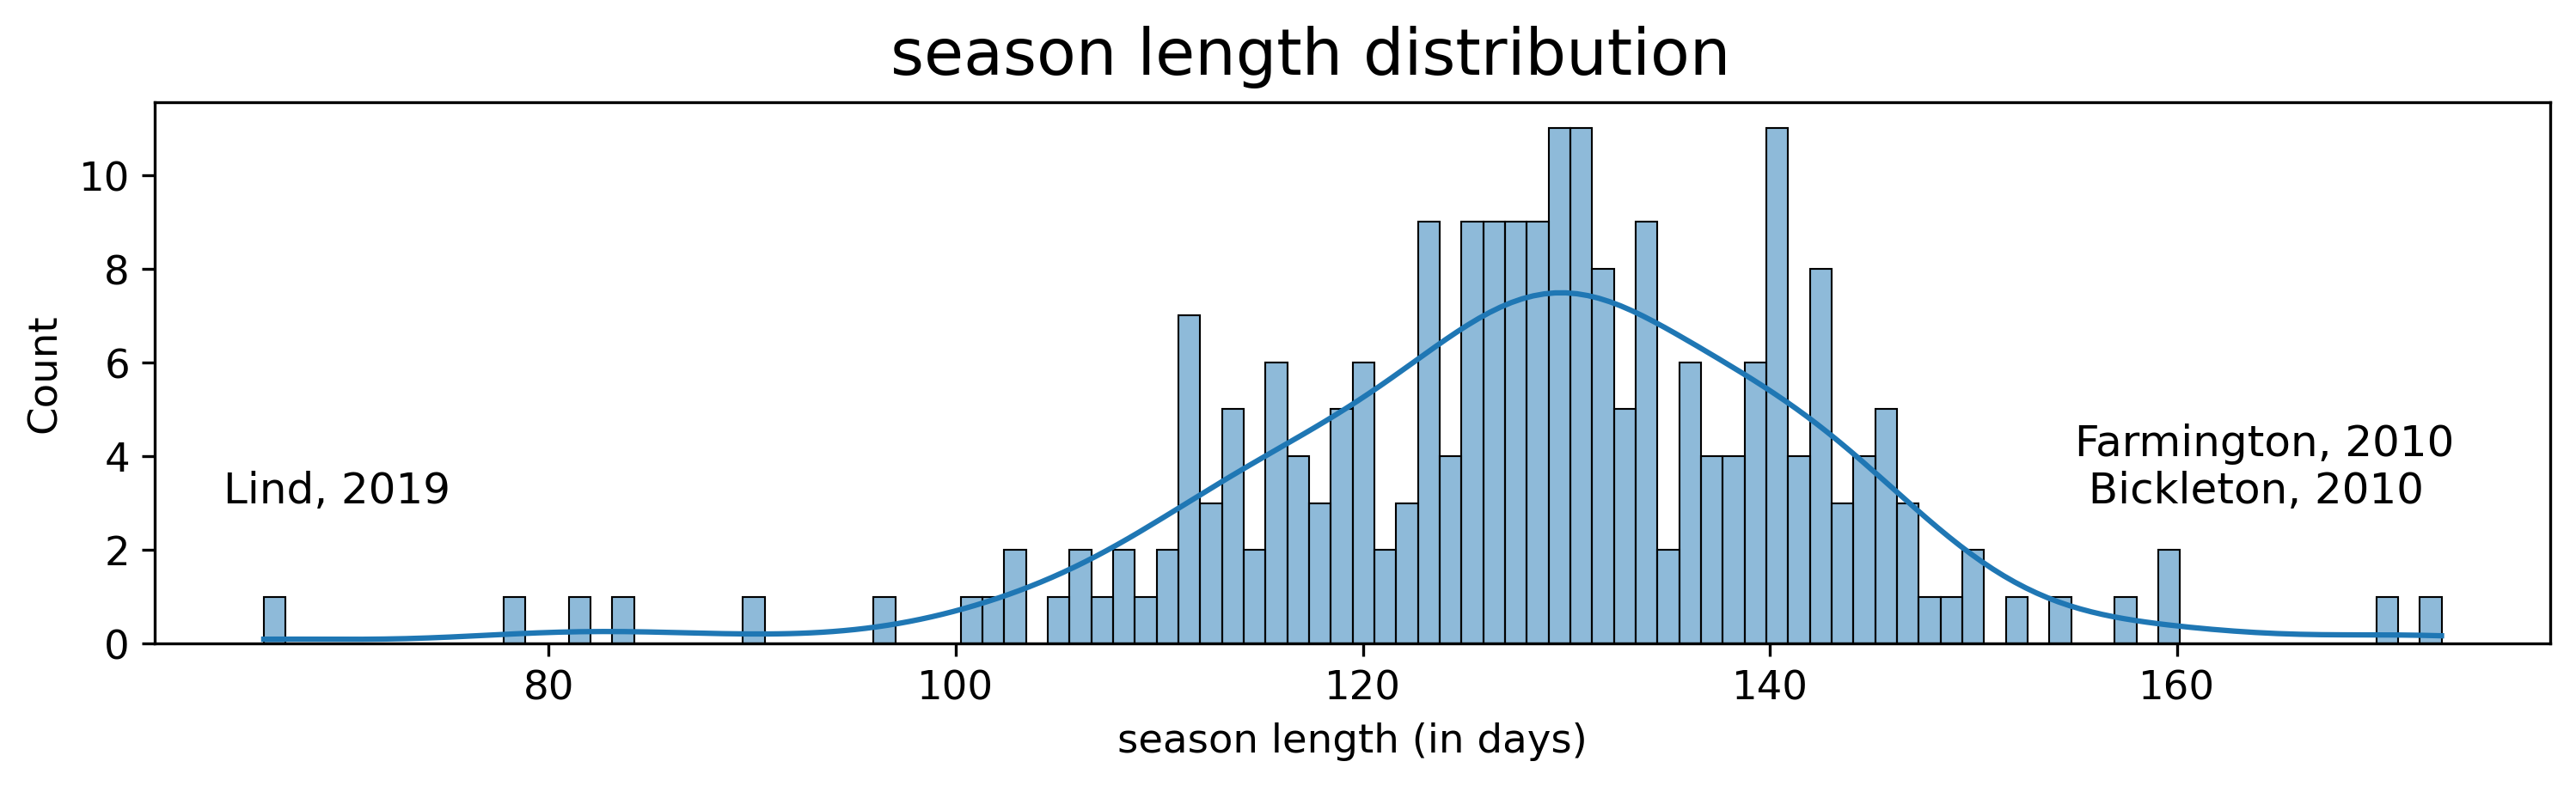

In [33]:
fig, axes = plt.subplots(1, 1, figsize=(10, 3), sharey=False, sharex=False, dpi=dpi_)
sns.set_style({'axes.grid' : False})

sns.histplot(data=df["season_length"], ax=axes, bins=100, kde=True);
# axes.legend(["ANPP (mean lb/acr)"], loc='upper right');
axes.set_xlabel("season length (in days)");

text_ = min_loc + ", " + str(min_year)
axes.text(df.loc[0, "season_length"]-2, 3, text_, fontsize = 12);

text_ = max_loc + ", " + str(max_year) + "\n " + max2_loc + ", " + str(max2_year) 
axes.text(df.loc[two_max_idx[0], "season_length"]-15, 3, text_, fontsize = 12);

# axes.set_title('season length distribution');
fig.suptitle('season length distribution', y=0.95, fontsize=18)
fig.subplots_adjust(top=0.85, bottom=0.15, left=0.052, right=0.981, wspace=-0.2, hspace=0)
file_name = wheat_plot_dir + "season_length_hist.pdf"
plt.savefig(file_name, dpi=400)

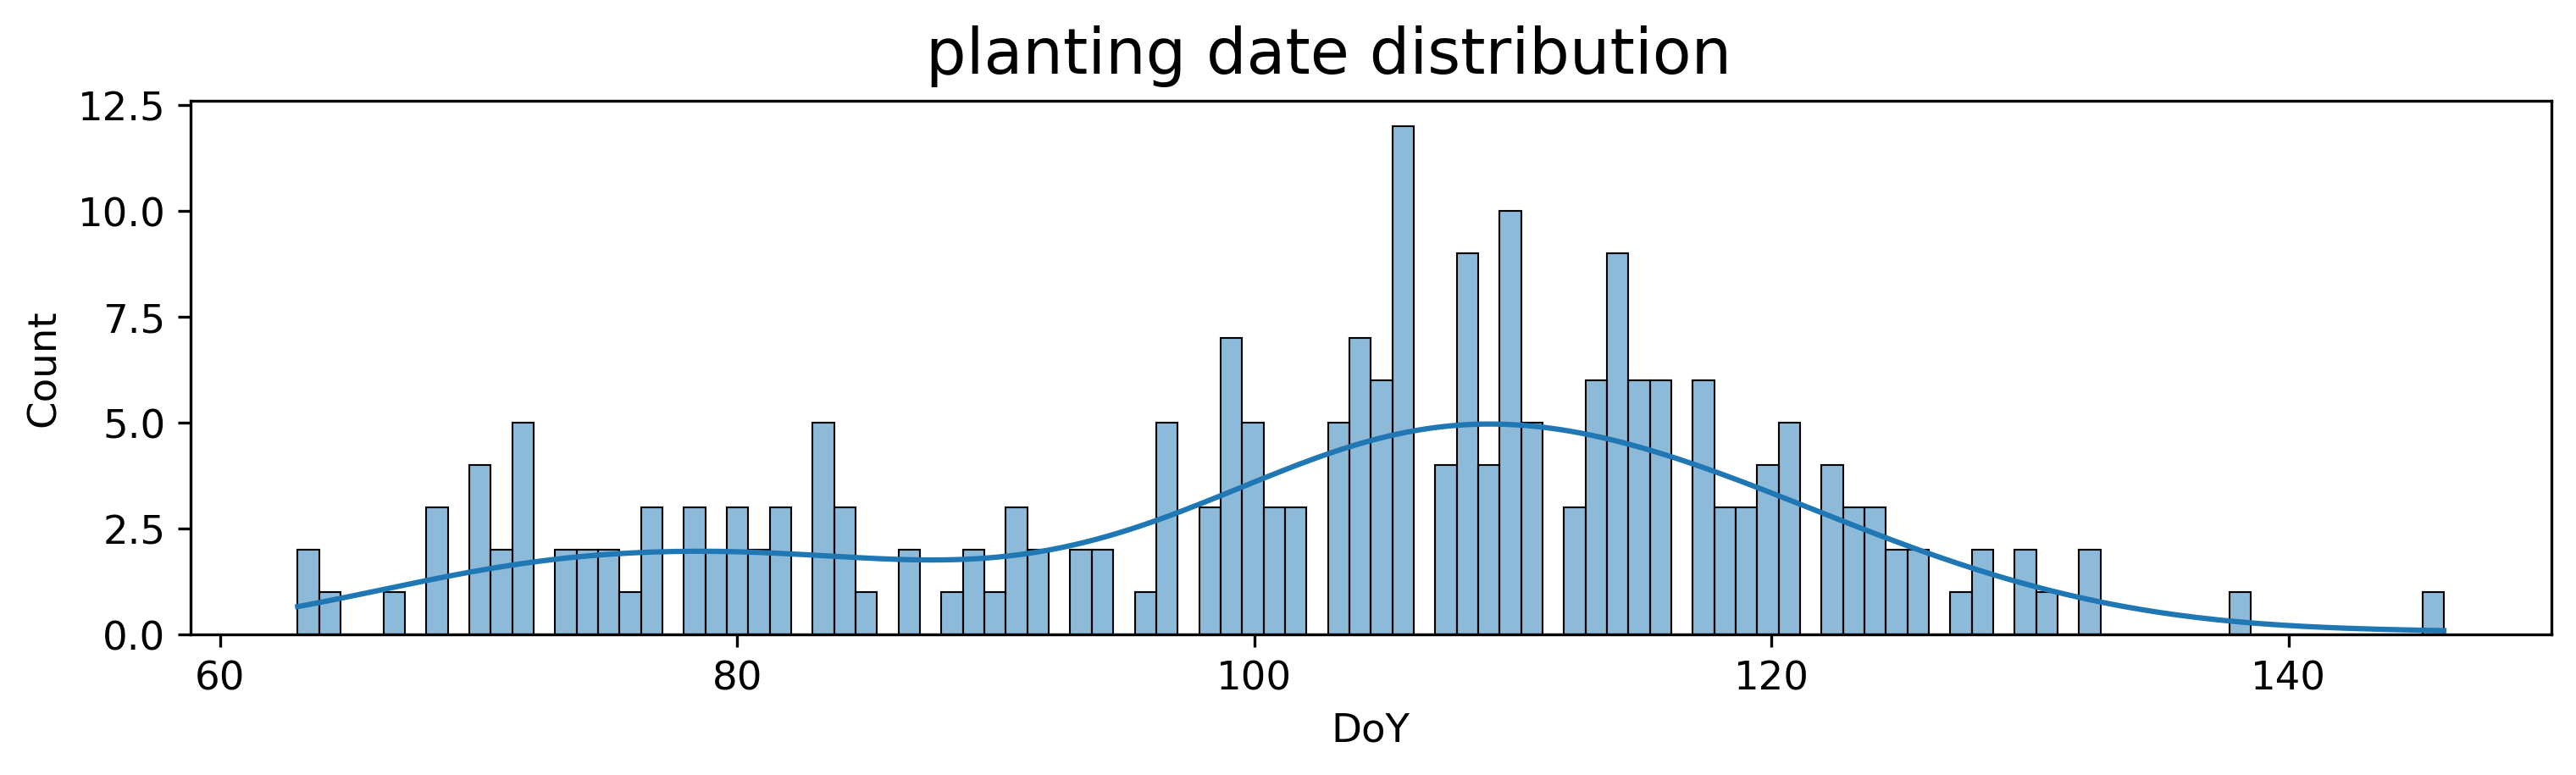

In [34]:
fig, axes = plt.subplots(1, 1, figsize=(10, 3), sharey=False, sharex=False, dpi=dpi_)
sns.set_style({'axes.grid' : False})

sns.histplot(data=wheat_date["plant_doy"], ax=axes, bins=100, kde=True);
# axes.legend(["ANPP (mean lb/acr)"], loc='upper right');
axes.set_xlabel("DoY");

# axes.set_title('season length distribution');
fig.suptitle('planting date distribution', y=0.95, fontsize=18)
fig.subplots_adjust(top=0.85, bottom=0.15, left=0.052, right=0.981, wspace=-0.2, hspace=0)
file_name = wheat_plot_dir + "planting_DoY_hist.pdf"
plt.savefig(file_name, dpi=400)

### annual DF, Seperate Varieties

In [35]:
# grab dgdd and precip
# drop dgdd
gdd_cols = [x for x in merged_with_vars.columns if ("gdd" in x)]
gdd_cols = [x for x in gdd_cols if not ("dgdd" in x)]

dgdd_cols = [x for x in merged_with_vars.columns if ("dgdd" in x)]
precip_cols = [x for x in merged_with_vars.columns if ("precip" in x)]

x_vars = gdd_cols + dgdd_cols + precip_cols

In [36]:
wheat_date.head(2)

,year,location,Latitude,Longitude,planting_date,heading_date,harvest_date,plant_doy,harvest_doy,season_length
0,2005,Almira,47.51921,-118.53658,2005-04-14,2005-06-25,2005-08-16,104,228,124
1,2006,Almira,47.51921,-118.53658,2006-04-18,2006-06-29,2006-08-10,108,222,114


In [37]:
wanted_cols = ['location', 'year', 'variety', 'yield'] + x_vars
df = merged_with_vars[wanted_cols].copy()
df = pd.merge(df, wheat_date[["year", "location", "season_length"]], on=["year", "location"], how="left")

df.fillna(value=0, inplace=True)
df.head(2)

,location,year,variety,yield,1_gdd,2_gdd,3_gdd,4_gdd,5_gdd,6_gdd,...,17_precip,18_precip,19_precip,20_precip,21_precip,22_precip,23_precip,24_precip,25_precip,season_length
0,Almira,2005,Alpowa,43.9,54.08,102.585,77.88,101.58,102.53,86.415,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124
1,Almira,2005,Alturas,37.7,54.08,102.585,77.88,101.58,102.53,86.415,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124


In [38]:
dict_season = {"location" : list(df["location"]),
               "year" : list(df["year"]),
               "variety" : list(df["variety"]),
               "yield" : list(df["yield"]),
              }
df_year = pd.DataFrame(dict_season)
df_year.head(2)

,location,year,variety,yield
0,Almira,2005,Alpowa,43.9
1,Almira,2005,Alturas,37.7


In [39]:
df_year["year_gdd"] = df[gdd_cols].sum(axis=1)
df_year["year_dgdd"] = df[dgdd_cols].sum(axis=1)
df_year["year_precip"] = df[precip_cols].sum(axis=1)
df_year.head(2)

,location,year,variety,yield,year_gdd,year_dgdd,year_precip
0,Almira,2005,Alpowa,43.9,2181.91,260.585,102.1
1,Almira,2005,Alturas,37.7,2181.91,260.585,102.1


### 4 Season DF, Seperate Varieties

In [40]:
subseason_count = 4
df["season_length_weeks"] = df["season_length"] / 7
df["week_count_per_season"] = round(df["season_length_weeks"] / subseason_count)
df["week_count_per_season"] = df["week_count_per_season"].astype(int)
df.head(2)

,location,year,variety,yield,1_gdd,2_gdd,3_gdd,4_gdd,5_gdd,6_gdd,...,19_precip,20_precip,21_precip,22_precip,23_precip,24_precip,25_precip,season_length,season_length_weeks,week_count_per_season
0,Almira,2005,Alpowa,43.9,54.08,102.585,77.88,101.58,102.53,86.415,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124,17.714286,4
1,Almira,2005,Alturas,37.7,54.08,102.585,77.88,101.58,102.53,86.415,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124,17.714286,4


In [41]:
dict_season = {"location" : list(df["location"]),
               "year" : list(df["year"]),
               "variety" : list(df["variety"]),
               "yield" : list(df["yield"]),
              }
df_season = pd.DataFrame(dict_season)
df_season.head(2)

,location,year,variety,yield
0,Almira,2005,Alpowa,43.9
1,Almira,2005,Alturas,37.7


In [42]:
desired_features = ["gdd", "dgdd", "precip"]
# form new season-wise columns
pre_var = ["s" + str(x) + "_" for x in list(range(1, subseason_count+1))]
pre_var = pre_var * len(desired_features)
post_feature = sorted(desired_features * 4)
season_cols = [x + y for x, y in zip(pre_var, post_feature)]

# add new columns to df_season
df_season[season_cols] = -10
df_season.head(2)

,location,year,variety,yield,s1_dgdd,s2_dgdd,s3_dgdd,s4_dgdd,s1_gdd,s2_gdd,s3_gdd,s4_gdd,s1_precip,s2_precip,s3_precip,s4_precip
0,Almira,2005,Alpowa,43.9,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10
1,Almira,2005,Alturas,37.7,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10


In [43]:
%%time

# we have to do a for-loop
for idx in df_season.index:
    curr_df = df.loc[idx].copy()
    week_count_per_season = curr_df["week_count_per_season"]
    # print (curr_df["location"] + " - " + str(curr_df["year"]))
    
    # The cuts between each season
    cut_offs = list(week_count_per_season * range(1, subseason_count+1))
    # since there is only 25 weeks worth of data
    # replace the last cutoff to 25 so that last season
    # contains everything.
    cut_offs[-1] = 25
    # takes care of first season
    cut_offs = [0] + cut_offs
    
    for season_ in range(1, subseason_count+1):
        start_week = cut_offs[season_-1] + 1
        end_week   = cut_offs[season_] + 1
        for var_ in desired_features:
            weekly_cols = [str(x) + "_" + var_ for x in range(start_week, end_week)]
            df_season.loc[idx, "s"+str(season_)+"_"+var_] = curr_df[weekly_cols].sum()

df_season.head(2)

CPU times: user 3.61 s, sys: 15.5 ms, total: 3.63 s
Wall time: 3.63 s


,location,year,variety,yield,s1_dgdd,s2_dgdd,s3_dgdd,s4_dgdd,s1_gdd,s2_gdd,s3_gdd,s4_gdd,s1_precip,s2_precip,s3_precip,s4_precip
0,Almira,2005,Alpowa,43.9,58.71,50.54,69.335,82.0,336.125,418.83,514.615,912.34,51.0,28.3,11.4,11.4
1,Almira,2005,Alturas,37.7,58.71,50.54,69.335,82.0,336.125,418.83,514.615,912.34,51.0,28.3,11.4,11.4


In [44]:
df_season[(df_season["location"] == "Almira") & (df_season["variety"] == "Alpowa")]

,location,year,variety,yield,s1_dgdd,s2_dgdd,s3_dgdd,s4_dgdd,s1_gdd,s2_gdd,s3_gdd,s4_gdd,s1_precip,s2_precip,s3_precip,s4_precip
0,Almira,2005,Alpowa,43.900000,58.710,50.540,69.335,82.000,336.125,418.830,514.615,912.340,51.0,28.3,11.4,11.4
6,Almira,2006,Alpowa,69.966667,92.315,65.005,55.890,58.670,302.105,465.350,570.600,676.005,6.7,59.0,10.8,3.0
13,Almira,2007,Alpowa,37.966667,73.965,61.250,63.395,58.555,350.365,438.165,551.350,755.525,9.4,21.6,4.2,8.2
21,Almira,2008,Alpowa,53.166667,83.665,57.080,63.145,66.940,335.240,404.755,585.780,648.030,4.3,15.4,2.3,0.0
30,Almira,2009,Alpowa,57.233333,60.725,57.875,58.550,53.800,282.850,501.150,530.030,711.260,21.6,6.3,2.5,15.9
39,Almira,2010,Alpowa,52.066667,59.725,46.025,50.075,31.610,332.305,463.740,662.290,641.610,14.8,85.3,9.8,2.9
48,Almira,2011,Alpowa,56.133333,77.990,79.115,82.085,48.310,346.370,518.630,681.320,572.580,67.8,19.8,6.4,0.0
57,Almira,2012,Alpowa,45.300000,92.330,62.695,75.255,47.980,416.240,528.245,801.195,510.430,23.5,64.0,22.2,0.0
67,Almira,2013,Alpowa,61.433333,86.030,65.535,63.390,40.635,447.190,507.205,791.245,717.160,9.6,48.0,5.0,19.3
78,Almira,2014,Alpowa,21.633333,68.175,50.900,46.830,61.775,386.235,449.195,643.225,878.585,8.2,11.9,12.9,37.8


## Annual X, Average Varieties

In [45]:
df_year.head(2)

,location,year,variety,yield,year_gdd,year_dgdd,year_precip
0,Almira,2005,Alpowa,43.9,2181.91,260.585,102.1
1,Almira,2005,Alturas,37.7,2181.91,260.585,102.1


In [46]:
df_year_avg = df_year[["location", "year", "yield"]].copy()
df_year_avg = df_year_avg.groupby(["location", "year"]).mean().reset_index(drop=False)

df_year_weather = df_year[["location", "year", "year_gdd", "year_dgdd", "year_precip"]].copy()
df_year_weather.drop_duplicates(inplace=True)

df_year_avg = pd.merge(df_year_avg, df_year_weather, on=["location", "year"], how="left")
df_year_avg.head(2)

,location,year,yield,year_gdd,year_dgdd,year_precip
0,Almira,2005,42.088889,2181.91,260.585,102.1
1,Almira,2006,71.019048,2014.06,271.880,79.5


## 4 Seasons X, Average Varieties

In [47]:
df_season.head(2)

,location,year,variety,yield,s1_dgdd,s2_dgdd,s3_dgdd,s4_dgdd,s1_gdd,s2_gdd,s3_gdd,s4_gdd,s1_precip,s2_precip,s3_precip,s4_precip
0,Almira,2005,Alpowa,43.9,58.71,50.54,69.335,82.0,336.125,418.83,514.615,912.34,51.0,28.3,11.4,11.4
1,Almira,2005,Alturas,37.7,58.71,50.54,69.335,82.0,336.125,418.83,514.615,912.34,51.0,28.3,11.4,11.4


In [48]:
seasonal_vars = [x for x in df_season.columns if "s" in x]

In [49]:
df_season_avg = df_season[["location", "year", "yield"]].copy()
df_season_avg = df_season_avg.groupby(["location", "year"]).mean().reset_index(drop=False)

df_season_weather = df_season[["location", "year"] + seasonal_vars].copy()
df_season_weather.drop_duplicates(inplace=True)

df_season_avg = pd.merge(df_season_avg, df_season_weather, on=["location", "year"], how="left")
df_season_avg.head(2)

,location,year,yield,s1_dgdd,s2_dgdd,s3_dgdd,s4_dgdd,s1_gdd,s2_gdd,s3_gdd,s4_gdd,s1_precip,s2_precip,s3_precip,s4_precip
0,Almira,2005,42.088889,58.710,50.540,69.335,82.00,336.125,418.83,514.615,912.340,51.0,28.3,11.4,11.4
1,Almira,2006,71.019048,92.315,65.005,55.890,58.67,302.105,465.35,570.600,676.005,6.7,59.0,10.8,3.0


In [50]:
print (df_season.shape)
print (df_season_avg.shape)

(1931, 16)
(229, 15)


In [53]:
merged_varieties["yield"] = merged_varieties["yield"].round(2)
merged_with_vars["yield"] = merged_with_vars["yield"].round(2)

df_year["yield"] = df_year["yield"].round(2)
df_year_avg["yield"] = df_year_avg["yield"].round(2)

df_season["yield"] = df_season["yield"].round(2)
df_season_avg["yield"] = df_season_avg["yield"].round(2)

In [54]:
filename = wheat_reOrganized + "average_and_seperate_varieties.sav"

export_ = {"averaged_varieties_weekly": merged_varieties, 
           "separate_varieties_weekly": merged_with_vars,

           "separate_varieties_annual": df_year, 
           "averaged_varieties_annual": df_year_avg, 
           
           "separate_varieties_4season": df_season,
           "averaged_varieties_4season" : df_season_avg,
           
           "dates" : wheat_date,
           "source_code" : "read_excel_dump",
           "Author": "HN",
           "Date" : datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

pickle.dump(export_, open(filename, 'wb'))